<a href="https://colab.research.google.com/github/ErickB24/PROYECTOFINAL-IA/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL
*Erick Steven Badillo Vargas - 
Daniel Andres Pineda Suarez - 
Juan Manuel Carmona*



## Importacion del dataset y Librerías




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
from sklearn.decomposition import PCA, KernelPCA


In [ ]:
# 2000
df_player00 = pd.read_excel("2000_player_stats.xlsx")
#1990
df_player = pd.read_excel("1990_player_stats.xlsx")
#2010
df_player10 = pd.read_excel("2010_player_stats.xlsx")
#2020
df_player20 = pd.read_excel("2020_player_stats.xlsx")

"""
pos = posicion dentro del campo - PG "ARMADOR" - SG "ESCOLTA" - SF "ALERO" - C "PIVOT" - PF "POSTE"
Age = Edad
TM = TEAM
G = Partidos Jugados
GS = Partidos en los que fue titular
MP = Minutos jugados 
FG = Tiro de campo
FGA = Intentos de Tiros de Campo
FG% = Porcentaje de tiro de Campo vs Acierto
3P 3PA 3P% = Tiros de 3 puntos, Intentos de 3 Puntos y porcentaje
2P 2PA 2P% = Tiros de 2 puntos, Intentos de 2 Puntos (Incluyendo Bandejas y todos los tiros posibles de 2 Puntos)
eFG = eficiencia
FT FT FT% = Tiros Libres, intentos de tiros libres y porcentaje
ORB DRB TRB = Rebotes ofensivos, defensivos y totales
AST STL BLK = Asistencias, Robos y Bloqueos
TOV = Perdidas
PF =   Faltas personales
PTS = puntos totales
"""
df_player10.describe()


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,497.000000,500.000000,500.00000,415.000000,500.000000,500.000000,496.000000,497.000000,500.000000,500.000000,481.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,196.054000,26.898000,47.664000,23.66200,1128.60200,175.602000,382.132000,6.470181,30.006000,84.83000,7.490911,145.596000,297.302000,6.508165,6.505376,86.666000,114.286000,31.861925,52.018000,144.710000,196.728000,96.768000,33.382000,22.964000,63.368000,97.674000,467.876000
std,107.933416,4.069979,26.809338,29.06981,926.61234,173.451279,365.805612,77.502493,42.723818,113.76917,84.795159,154.791284,305.990056,77.578247,77.499750,105.832999,133.326051,173.876982,60.353515,146.412921,200.930107,123.602919,32.697191,31.974168,60.958153,74.919889,467.893631
min,1.000000,19.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,24.000000,24.000000,0.00000,266.00000,33.500000,74.500000,0.394000,0.000000,2.00000,0.182000,23.750000,52.750000,0.425000,0.437000,12.000000,17.750000,0.643000,9.000000,30.750000,42.750000,13.000000,7.750000,3.000000,13.000000,31.000000,86.750000
50%,203.500000,26.000000,51.000000,7.00000,890.00000,125.500000,279.000000,0.441000,8.000000,25.00000,0.318000,92.000000,194.000000,0.474000,0.488000,48.000000,66.000000,0.743000,28.500000,96.500000,129.000000,48.000000,24.500000,11.000000,49.500000,83.500000,338.000000
75%,284.250000,30.000000,73.250000,46.25000,1861.50000,274.250000,580.250000,0.489000,48.750000,138.00000,0.369500,213.750000,462.000000,0.511000,0.523000,125.500000,159.250000,0.818000,72.000000,210.250000,284.250000,137.000000,51.250000,29.250000,95.500000,155.250000,719.750000
max,381.000000,39.000000,82.000000,82.00000,3239.00000,794.000000,1668.000000,1000.000000,209.000000,525.00000,1000.000000,703.000000,1375.000000,1000.000000,1000.000000,756.000000,840.000000,1000.000000,330.000000,798.000000,1082.000000,892.000000,189.000000,228.000000,295.000000,287.000000,2472.000000


## Adecuación del Dataset


Al momento de filtrar las estadísticas que se iban a emplear para nuestro conjunto de entrenamiento, fue necesario eliminar las columnas con las etiquetas que no consideramos necesarias para validar nuestra hipótesis. Algunas que decidimos eliminar la columna del nombre de los jugadores "Player", el identificador de orden dentro del dataset "Rk", el equipo de cada jugador "Tm", la edad del jugador "Age", los partidos como miembro de un quinteto titular "GS" y "eFG%" una estadística avanzada empleada en situaciones particulares como selección de premios de final de temporada.

Adicionalmente fueron intercambiadas cada una de las posiciones principales por valores numéricos correspondientes a su posición en pista, de la siguiente manera:  

▶'PG' Point Guard (Base o armador)-> 1

▶'SG' Shooting Guard (Escolta)-> 2

▶'SF' Small Forward (Alero)-> 3

▶'PF' Power Forward (Ala Pívot)-> 4

▶'C' Center (Pívot o poste)-> 5

Y también sus variantes mixtas:

▶'SG-PG'->2

▶'PG-SG'->1 

▶'C-PF' ->4 

▶'SF-SG'->3

Por otra parte, y debido a que la columna 'MP' contiene los minutos jugados en la temporada completa, son eliminados todos los jugadores con tiempo de juego inferior a 48 minutos, lo que corresponde a la duración de un partido, 4 cuartos de 12 minutos reglamentarios; esto debido a que pueden entorpecer el propósito de nuestro conjunto de entrenamiento.

Finalmente, las columnas correspondientes a los porcentajes de tiro de campo "FG%", tiros de 3 "3P%", lanzamientos de dos puntos "2P%" y porcentaje de tiros libres "FT%" que se encuentren con valores indefinidos (para jugadores que tienen 0 sobre 0 intentos realizados), se llenaron con ceros.



In [ ]:
#Temporada 2000
#LIMPIAR DATASET 
df_player00 = df_player00.drop(["Player","Rk","Tm","Age","GS","eFG%","FG","FGA","2P","2PA","3P","3PA","FT","FTA"],axis= 1)

#Se cambian las posiciones por Numeros
df_player00['Pos'] = df_player00['Pos'].map({ 'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5,'SG-PG':2, 'PG-SG':1, 'C-PF':4, 'SF-SG':3},na_action=None)

#Se eliminan jugadores que no necesitamos
df_player00 = df_player00[df_player00["MP"].astype(float) > 48]
df_player00 = df_player00.fillna({'3P%': 0})
df_player00 = df_player00.fillna({'FG%': 0})
df_player00 = df_player00.fillna({'2P%': 0})
df_player00 = df_player00.fillna({'FT%': 0})

#Temporada 1990
#LIMPIAR DATASET 
df_player = df_player.drop(["Player","Rk","Tm","Age","GS","eFG%","FG","FGA","2P","2PA","3P","3PA","FT","FTA"],axis= 1)

#Se cambian las posiciones por Numeros
df_player['Pos'] = df_player['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5,'SG-SF':3, 'PF-SF':3, 'SF-SG':3 },na_action=None)

#Se eliminan jugadores que no necesitamos
df_player = df_player[df_player["MP"].astype(float) > 48]
df_player = df_player.fillna({'3P%': 0})
df_player = df_player.fillna({'FG%': 0})
df_player = df_player.fillna({'2P%': 0})
df_player = df_player.fillna({'FT%': 0})

#Temporada 2010
#LIMPIAR DATASET 
df_player10 = df_player10.drop(["Player","Rk","Tm","Age","GS","eFG%","FG","FGA","2P","2PA","3P","3PA","FT","FTA"],axis= 1)

#Se cambian las posiciones por Numeros
df_player10['Pos'] = df_player10['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5,'SG-PG':2, 'PG-SG':1, 'C-PF':4, 'SF-SG':3, 'PF-SF':3,'PF-C':4 ,'SG-PF':1},na_action=None)

#Se eliminan jugadores que no necesitamos
df_player10 = df_player10[df_player10["MP"].astype(float) > 48]
df_player10 = df_player10.fillna({'3P%': 0})
df_player10 = df_player10.fillna({'FG%': 0})
df_player10 = df_player10.fillna({'2P%': 0})
df_player10 = df_player10.fillna({'FT%': 0})


#Temporada 2020
#LIMPIAR DATASET 
df_player20 = df_player20.drop(["Player","Rk","Tm","Age","GS","eFG%","FG","FGA","2P","2PA","3P","3PA","FT","FTA"],axis= 1)

#Se cambian las posiciones por Numeros
df_player20['Pos'] = df_player20['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5,'SG-PG':2, 'PG-SG':1, 'C-PF':4, 'SF-SG':3, 'PF-SF':3,'PF-C':4 ,'SG-PF':1,'SF-C':3,'SG-SF':3, 'SF-PF':3},na_action=None)

#Se eliminan jugadores que no necesitamos
df_player20 = df_player20[df_player20["MP"].astype(float) > 48]
df_player20 = df_player20.fillna({'3P%': 0})
df_player20 = df_player20.fillna({'FG%': 0})
df_player20 = df_player20.fillna({'2P%': 0})
df_player20 = df_player20.fillna({'FT%': 0})

df_player


,Pos,G,MP,FG%,3P%,2P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5,80,1691,0.484,0.750,0.480,0.692,154,277,431,67,36,25,70,248,362
1,1,79,2690,0.402,0.366,0.431,0.850,49,176,225,495,121,3,141,133,1221
2,3,78,2005,0.488,0.333,0.506,0.756,117,188,305,145,34,19,121,201,1099
3,1,75,2727,0.438,0.374,0.460,0.831,69,257,326,453,113,18,185,238,1342
4,4,82,1893,0.473,0.204,0.490,0.812,151,223,374,142,60,39,101,219,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2,61,972,0.395,0.293,0.407,0.721,25,63,88,66,42,11,49,100,394
454,3,62,1421,0.556,0.000,0.561,0.733,49,136,185,96,39,46,73,160,788
456,3,80,2960,0.548,0.306,0.557,0.782,160,318,478,288,99,49,160,190,1685
457,1,82,1393,0.421,0.271,0.454,0.813,29,93,122,231,82,4,80,84,383


##Escalizacion de los Datos

Se van a escalizar los datos con el método de “EstandarScaler“ el cual elimina la media y escala con la desviación estándar 

In [ ]:
#Temporada 2000
X00 = df_player00.values
sc = StandardScaler()
sc.fit(X00)
X00 = sc.transform(X00)
print (X00)

#Temporada 1990
X = df_player.values
sc.fit(X)
X = sc.transform(X)

#Temporada 2010
X10 = df_player10.values
sc.fit(X10)
X10 = sc.transform(X10)

#Temporada 2020
X20 = df_player20.values
sc.fit(X20)
X20 = sc.transform(X20)

[[-1.30002249 -0.47113205 -0.80410404 ... -0.74270927 -0.84042687
  -0.4459168 ]
 [-0.6235402  -0.96592827 -0.87495536 ... -0.61795255 -0.78865808
  -0.77163027]
 [ 0.05294209  1.17818867  2.15340146 ...  2.45418154  1.59270612
   2.48970711]
 ...
 [-1.30002249  1.21942169  0.41325031 ...  0.86353343  0.38908182
   0.0416027 ]
 [ 0.72942438 -0.05880187 -0.73647325 ... -0.74270927 -0.52981415
  -0.65185177]
 [ 0.72942438 -0.63606412 -0.90501349 ... -0.86746598 -0.6980627
  -0.76532613]]


## Análisis por componentes principales (PCA)

Se realizo la descomposición por componentes principales, para escoger el número de componentes principales se realizó una iteración hiperparametrica, buscando un “variance ratio” mayor al 95%

([<matplotlib.axis.XTick at 0x7f7725ed5710>,
 <a list of 19 Text major ticklabel objects>)

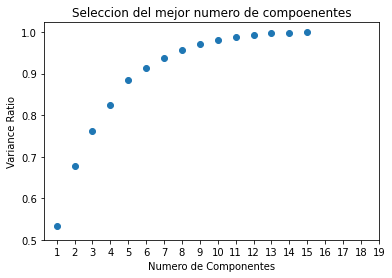

In [ ]:
#SELECCION OPTIMA DE NUMERO DE COMPONENTES 
ratio =[]
componentes = []
for n in range(1,16):
    pca = decomposition.PCA(n_components=n,whiten=True,svd_solver='arpack',random_state=0)
    pca.fit(X)
    suma = sum(pca.explained_variance_ratio_)
    
    ratio.append(suma)
    componentes.append(n)

plt.figure()
plt.title("Seleccion del mejor numero de compoenentes")
plt.xlabel('Numero de Componentes')
plt.ylabel('Variance Ratio')
plt.scatter(componentes, ratio)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.xticks(range(1,20))

    

 Observando la gráfica obtenemos que si hacemos reducción de componentes el más optimo sería el n_components=10.

In [ ]:
pca = decomposition.PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
# 2000
pca.fit(X00)
X00=pca.transform(X)

# 1990
pca.fit(X)
X=pca.transform(X)


# 2010
pca.fit(X10)
X10=pca.transform(X10)


# 2020
pca.fit(X20)
X20=pca.transform(X20)


## K medias
el primer algoritmo de agrupamiento a probar es el K-means, del cual se le hallará el k optimmo, se iteraran hiperparametros y se implementará el mejor.

### Seleccion del K optimo
Se seleccionó el k óptimo, utilizando el método de silueta e iterando el número de clústeres con diferentes semillas, para así obtener el número de clústeres con el que más fácil se hace cohesión entre grupos

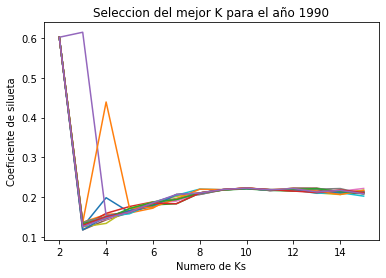

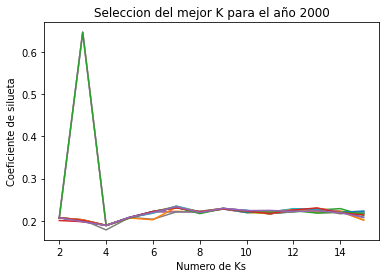

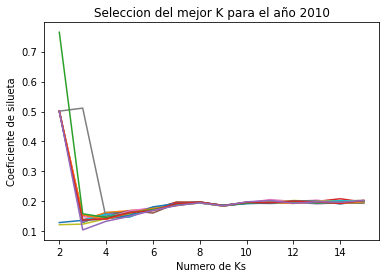

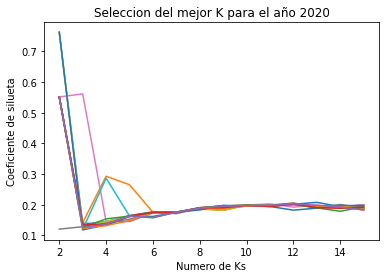

In [ ]:
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    kmedias = KMeans(n_clusters=k,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    kmedias.fit(X)
    Labels=kmedias.predict(X)
    Silueta.append(silhouette_score(X, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)
  plt.title("Seleccion del mejor K para el año 1990")
  plt.xlabel('Numero de Ks')
  plt.ylabel('Coeficiente de silueta')

plt.show()

#-----------------------------------------------------------2000-----------------------------------------------------------------------------------------
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    kmedias = KMeans(n_clusters=k,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    kmedias.fit(X00)
    Labels=kmedias.predict(X00)
    Silueta.append(silhouette_score(X00, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)
  plt.title("Seleccion del mejor K para el año 2000")
  plt.xlabel('Numero de Ks')
  plt.ylabel('Coeficiente de silueta')

plt.show()

#-----------------------------------------------------------2010-----------------------------------------------------------------------------------------
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    kmedias = KMeans(n_clusters=k,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    kmedias.fit(X10)
    Labels=kmedias.predict(X10)
    Silueta.append(silhouette_score(X10, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)
  plt.title("Seleccion del mejor K para el año 2010")
  plt.xlabel('Numero de Ks')
  plt.ylabel('Coeficiente de silueta')

plt.show()

#-----------------------------------------------------------2020-----------------------------------------------------------------------------------------
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  K=[]
  for k in range(kinicial,kfinal,step):
    kmedias = KMeans(n_clusters=k,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
    kmedias.fit(X20)
    Labels=kmedias.predict(X20)
    Silueta.append(silhouette_score(X20, Labels, metric = 'euclidean'))
    K.append(k)  
  #print(Silueta)
  plt.plot(K,Silueta)
  plt.title("Seleccion del mejor K para el año 2020")
  plt.xlabel('Numero de Ks')
  plt.ylabel('Coeficiente de silueta')

plt.show()

parla del mejor K !! y como cambia segun los años 

### Iteracion de Hiperparametros 
(!CUIDADO! SE DEMORA UN POCO)

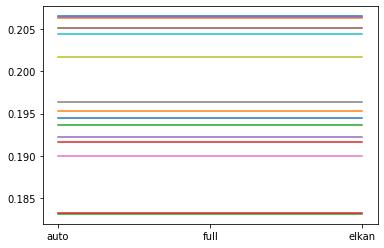

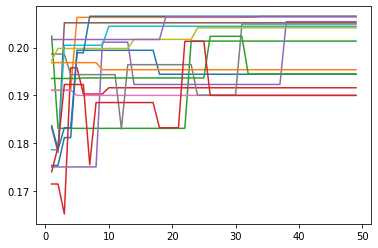

In [ ]:
for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  algo=["auto","full","elkan"]
  for a in algo:
    kmedias = KMeans(n_clusters=7,random_state=random_state,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso
                      algorithm=a) 
    kmedias.fit(X)
    Labels=kmedias.predict(X)
    Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
  #print(Silueta)
  plt.plot(algo,Silueta)

plt.show()

for random_state in range(1,16):
  kinicial=2
  kfinal=1+15
  step=1
  Silueta=[]
  ini =[]
  for i in range(1,50):
    kmedias = KMeans(n_clusters=7,random_state=random_state,
                      init="k-means++", #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=i, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso
                      algorithm="auto") 
    kmedias.fit(X)
    Labels=kmedias.predict(X)
    Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
    ini.append(i)
  #print(Silueta)
  plt.plot(ini,Silueta)

plt.show()

Se iteraron los hiperparametros, y se encontró que para esta aplicacion no hay diferencias entre los algoritmos para resolver K-means, tambien se iterío el número de veces que corre el algoritmo, obteniendo que con n_init mayor a 30 ya se obtienen los mejores valores de silueta para el algoritmo.

### Implementacion del mejor

0.2103480062542292
[1 5 1 5 1 4 4 1 1 0 1 1 6 4 4 1 0 6 1 1 4 0 7 1 5 0 0 0 1 4 5 7 4 6 3 1 0
 0 1 4 1 1 0 1 0 1 4 6 0 1 1 0 0 1 0 0 1 6 1 1 5 4 4 1 0 0 0 4 5 1 1 4 6 0
 0 6 1 4 1 0 4 4 1 1 5 1 4 1 6 5 0 0 4 5 1 6 0 0 1 4 1 7 1 1 5 5 1 1 0 1 7
 4 5 5 1 4 1 4 4 4 5 3 0 6 0 6 6 5 4 1 6 0 0 0 1 6 4 6 0 1 4 1 2 1 1 1 1 5
 5 4 4 4 4 0 1 4 2 4 0 1 0 4 4 0 1 0 5 0 4 5 4 4 5 4 4 1 5 1 4 5 5 0 0 0 1
 0 0 4 1 7 5 1 1 4 6 1 1 0 2 1 1 3 1 0 0 0 6 6 7 1 2 0 4 4 6 1 1 1 4 4 1 0
 0 1 4 4 4 1 6 1 6 6 1 4 1 4 0 1 4 4 0 0 4 0 6 1 0 7 1 4 5 0 0 1 1 0 4 1 4
 4 1 6 4 4 4 3 0 0 1 0 0 1 6 7 0 6 0 4 1 0 1 6 3 1 0 1 1 1 5 1 5 4 1 5 4 6
 0 6 1 6 1 0 1 1 1 5 1 4 4 1 5 1 7 6 0 0 1 0 0 1 4 7 0 0 1 0 6 1 6 1 0 0 6
 0 1 4 4 1 4 1 4 1 5 4 4 6 1 1 7 0 4 5 5 4 4 4 6 4 1 1 5 6 6 1 1 6 4 1 1 4
 4 4 1 1 2 2 0 1 0 4 4 4 0 0 3 0 4 1 5 1 5 0 0 0 0 4 7 1 1 4 6 1 1 6 1 7 0
 4 4 0 0 1 0 0 0 6 1 1 1 4 4 1 1 4 4]


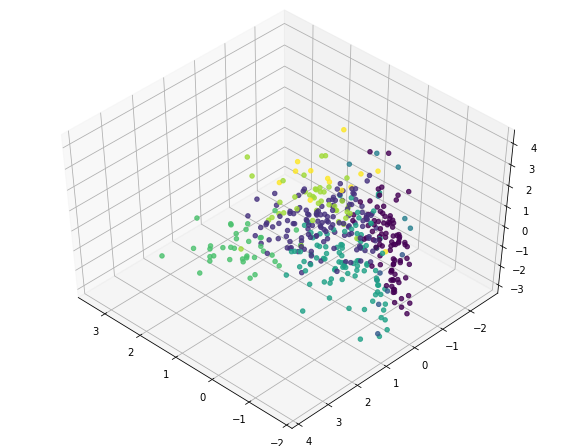

In [ ]:
#PARA EL AÑO 1990
kmedias = KMeans(n_clusters=8,random_state=2,
                      init='k-means++', #init{‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
                      n_init=20, # numero de veces que corre el algoritmo con diferentes inicializaciones toma el de mejor inercia
                      max_iter=300, #máximo nuero de iteraciones
                      tol=0.0001, #Tolerancia o cambio en dos iteraciones seguidas
              #precompute_distances='deprecated',# ya no se usa --- will be removed in 0.25. It has no effect.
                      copy_x=True, # por como se implementa el algoritmo es posible que se generen cambios en los datos si se pone en falso, ver mas detalles en la función
              #n_jobs='deprecated', #will be removed in 0.25
                      algorithm='auto') # Note que esta implementación de K-means solo usa una corrida del algoritmo, no proteje contra minimos locales en la solución
kmedias.fit(X)
Labels=kmedias.predict(X)
print(silhouette_score(X, Labels, metric = 'euclidean'))
clustersitos = kmedias.labels_
print(clustersitos)
#figura 3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Labels, alpha=0.8)
plt.show()

### Predicción de otros años

coeficiente de silueta: 0.14342070584239627


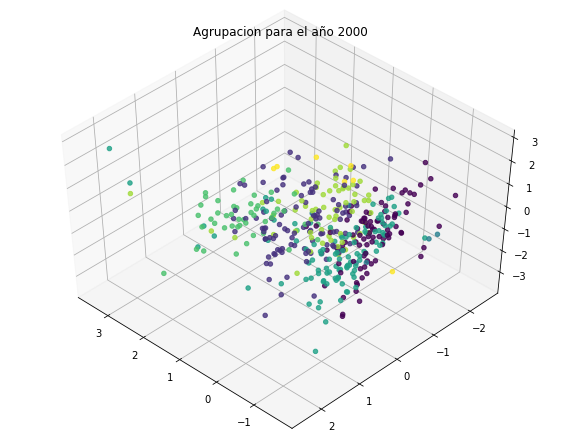

coeficiente de silueta: 0.09037043286086562


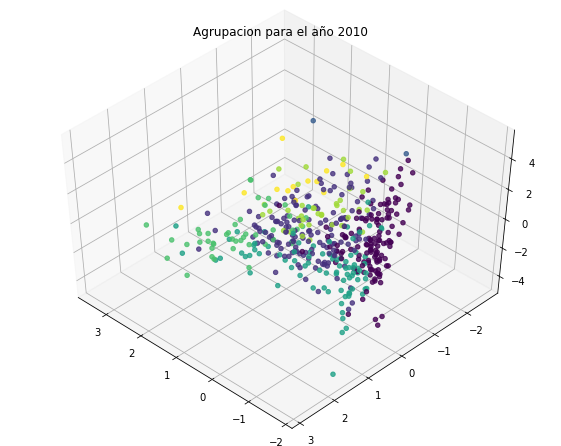

coeficiente de silueta: 0.119490315053161


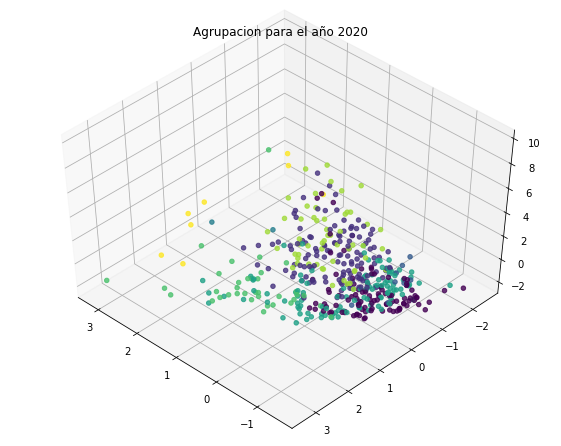

In [ ]:
Labels00=kmedias.predict(X00)
Labels10=kmedias.predict(X10)
Labels20=kmedias.predict(X20)

#------------------------------------- PLOT-------------------------------------
print("coeficiente de silueta:",silhouette_score(X00, Labels00, metric = 'euclidean'))
#figura 3D

fig = plt.figure(1, figsize=(8, 6))

plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X00[:, 0], X00[:, 1], X00[:, 2], c=Labels00, alpha=0.8)
plt.title("Agrupacion para el año 2000")
plt.show()

#------------------------------------- PLOT 10-------------------------------------
print("coeficiente de silueta:",silhouette_score(X10, Labels10, metric = 'euclidean'))
#figura 3D
fig = plt.figure(1, figsize=(8, 6))

plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X10[:, 0], X10[:, 1], X10[:, 2], c=Labels10, alpha=0.8)
plt.title("Agrupacion para el año 2010")
plt.show()
#------------------------------------- PLOT 20-------------------------------------
print("coeficiente de silueta:",silhouette_score(X20, Labels20, metric = 'euclidean'))
#figura 3D
fig = plt.figure(1, figsize=(8, 6))

plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X20[:, 0], X20[:, 1], X20[:, 2], c=Labels20, alpha=0.8)
plt.title("Agrupacion para el año 2020")
plt.show()

## MeanShift


### iteración de Hiperparametros

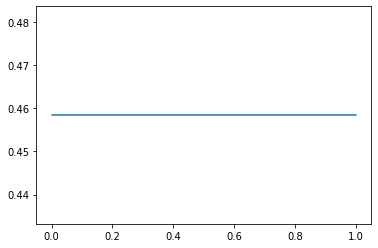

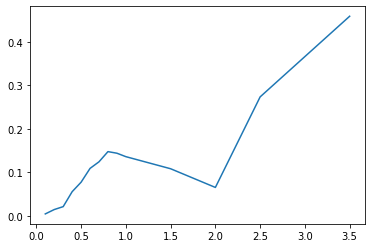

In [ ]:
v = [True,False]
Silueta=[]
ini=[]
for i in v:
  MS = MeanShift(bandwidth=None, seeds=None, bin_seeding=v, n_jobs=-1, max_iter=300) 
  MS.fit(X)
  Labels=MS.predict(X)
  Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
  ini.append(i)
  #print(Silueta)
plt.plot(ini,Silueta)

plt.show()
v = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2.0,2.5,3.5]
Silueta=[]
ini=[]
for i in v:
  MS = MeanShift(bandwidth=i, n_jobs=-1, max_iter=300) #n_jobs = -1 para usar todos los nucleos del procesador y que sea más rapida la implemetnacion
  MS.fit(X)
  Labels=MS.predict(X)
  Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
  ini.append(i)
  #print(Silueta)
plt.plot(ini,Silueta)

plt.show()

### Implementacion del mejor

coeficiente de silueta: 0.13591045494363152


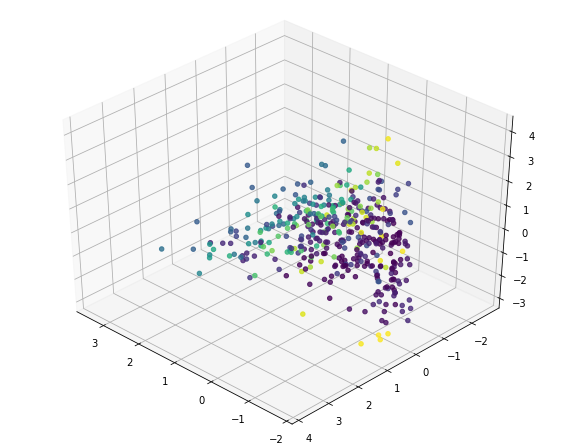

In [ ]:

MS = MeanShift(bandwidth=1.0, n_jobs=-1, max_iter=300) 
MS.fit(X)
Labels=MS.predict(X) 
print("coeficiente de silueta:",silhouette_score(X, Labels, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Labels, alpha=0.8)
plt.show()

plt.show()


### Predicción de otros años

coeficiente de silueta: -0.06282523454191598


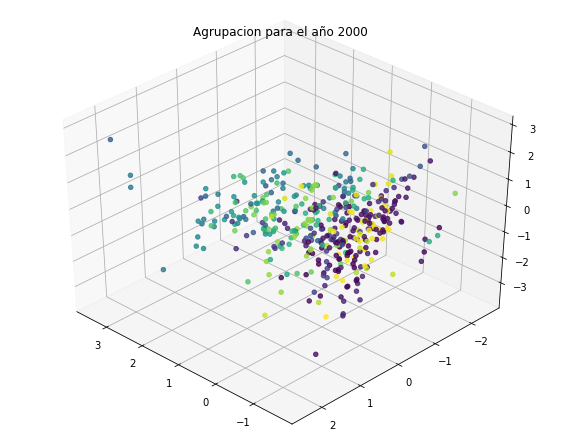

coeficiente de silueta: -0.09339637940863262


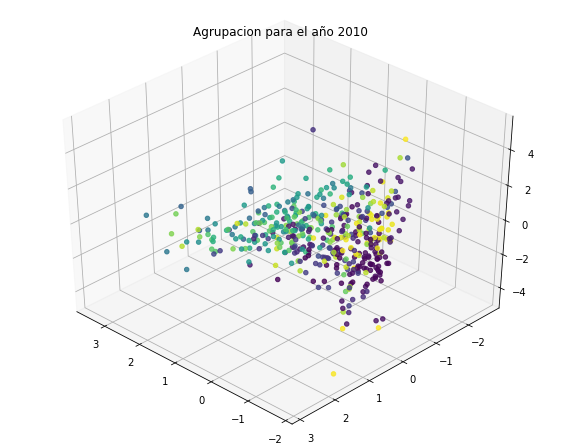

coeficiente de silueta: -0.06461598188288313


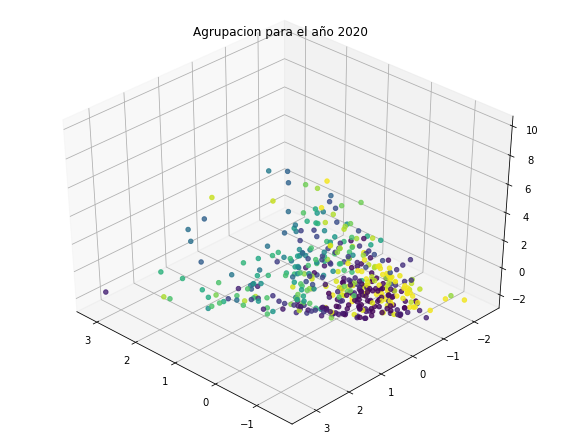

In [ ]:
Labels00=MS.predict(X00)
Labels10=MS.predict(X10)
Labels20=MS.predict(X20)
#----------------------------------------------PLOT00---------------------------
print("coeficiente de silueta:",silhouette_score(X00, Labels00, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X00[:, 0], X00[:, 1], X00[:, 2], c=Labels00, alpha=0.8)
plt.title("Agrupacion para el año 2000")
plt.show()
#----------------------------------------------PLOT10--------------------------- 
print("coeficiente de silueta:",silhouette_score(X10, Labels10, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X10[:, 0], X10[:, 1], X10[:, 2], c=Labels10, alpha=0.8)
plt.title("Agrupacion para el año 2010")

plt.show()
#----------------------------------------------PLOT20--------------------------- 
print("coeficiente de silueta:",silhouette_score(X20, Labels20, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X20[:, 0], X20[:, 1], X20[:, 2], c=Labels20, alpha=0.8)
plt.title("Agrupacion para el año 2020")

plt.show()


## DBSCAN


### Iteracion de Hiperparametros

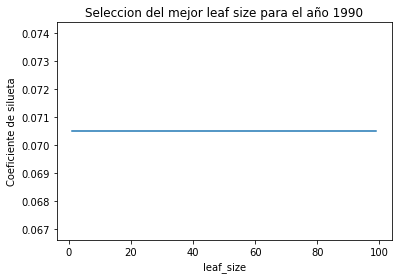

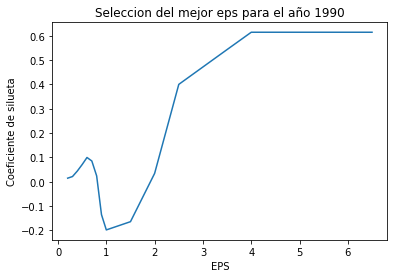

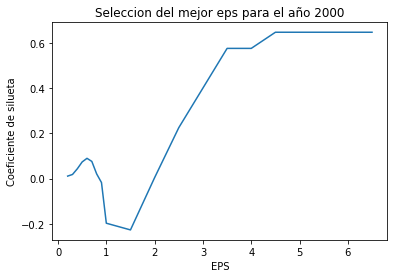

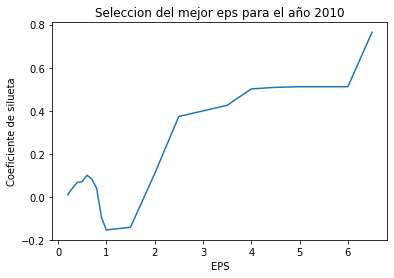

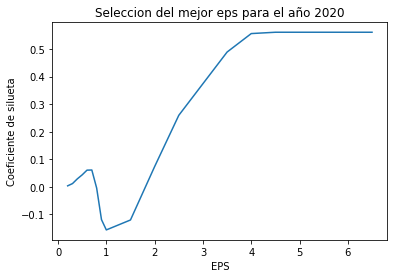

In [ ]:
#---------------------------------------------------------1990----------------------------------------
Silueta=[]
ini=[]
for i in range(1,100):
  DB = DBSCAN(eps=0.5, min_samples=1, metric='euclidean', algorithm='auto', leaf_size=i, p=None, n_jobs=-1)
  DB.fit(X)
  Labels=DB.fit_predict(X)
  Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
  ini.append(i)
  #print(Silueta)
plt.plot(ini,Silueta)
plt.title("Seleccion del mejor leaf size para el año 1990")
plt.xlabel('leaf_size')
plt.ylabel('Coeficiente de silueta')
plt.show()

epss = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2.0,2.5,3.5,4.0,4.5,5.0,5.5,6.0,6.5]
Silueta00=[]
ini00=[]
Silueta10=[]
ini10=[]
Silueta20=[]
ini20=[]
Silueta=[]
ini=[]
for i in epss:
  DB = DBSCAN(eps=i, min_samples=1, metric='euclidean', algorithm='auto', leaf_size=30, p=None, n_jobs=-1 )#n_jobs = -1 para usar todos los nucleos del procesador y que sea más rapida la implemetnacion
  
  #----------------------------------1990---------------------------------------
  DB.fit(X)
  Labels=DB.fit_predict(X)
  Silueta.append(silhouette_score(X, Labels, metric = 'euclidean')) 
  ini.append(i)
  # ---------------------------------2000---------------------------------------
  DB.fit(X00)
  Labels00=DB.fit_predict(X00)
  Silueta00.append(silhouette_score(X00, Labels00, metric = 'euclidean')) 
  ini00.append(i)
  # ---------------------------------2000---------------------------------------
  DB.fit(X10)
  Labels10=DB.fit_predict(X10)
  Silueta10.append(silhouette_score(X10, Labels10, metric = 'euclidean')) 
  ini10.append(i)
  # ---------------------------------2000---------------------------------------
  DB.fit(X20)
  Labels20=DB.fit_predict(X20)
  Silueta20.append(silhouette_score(X20, Labels20, metric = 'euclidean')) 
  ini20.append(i)


plt.plot(ini,Silueta)
plt.title("Seleccion del mejor eps para el año 1990")
plt.xlabel('EPS')
plt.ylabel('Coeficiente de silueta')
plt.show()

plt.plot(ini00,Silueta00)
plt.title("Seleccion del mejor eps para el año 2000")
plt.xlabel('EPS')
plt.ylabel('Coeficiente de silueta')
plt.show()

plt.plot(ini10,Silueta10)
plt.title("Seleccion del mejor eps para el año 2010")
plt.xlabel('EPS')
plt.ylabel('Coeficiente de silueta')
plt.show()

plt.plot(ini20,Silueta20)
plt.title("Seleccion del mejor eps para el año 2020")
plt.xlabel('EPS')
plt.ylabel('Coeficiente de silueta')
plt.show()


### Implementación del mejor

0.09956071939101609


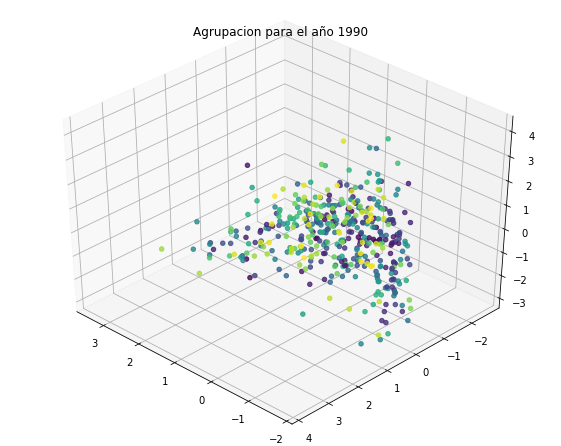

In [ ]:
DB = DBSCAN(eps=0.6, min_samples=1, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None )#n_jobs = -1 para usar todos los nucleos del procesador y que sea más rapida la implemetnacion
DB.fit(X)
Labels=DB.fit_predict(X)
print(silhouette_score(X, Labels, metric = 'euclidean')) 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Labels, alpha=0.8)
plt.title("Agrupacion para el año 1990")
plt.show()


### Predicción de otros años

coeficiente de silueta: 0.08973026032606908


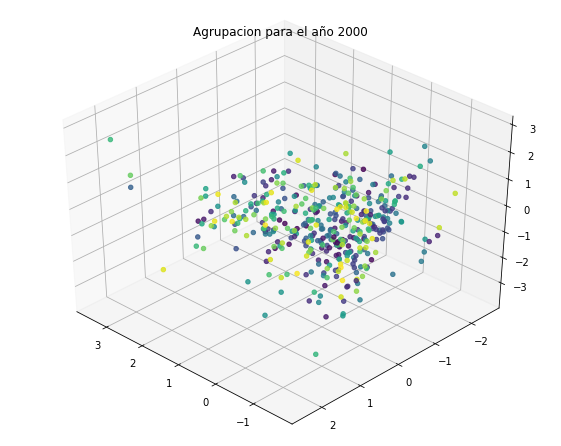

coeficiente de silueta: 0.1001051179252435


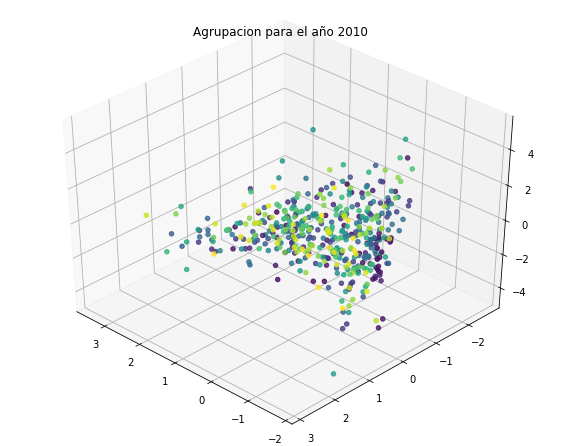

coeficiente de silueta: 0.06080244937837944


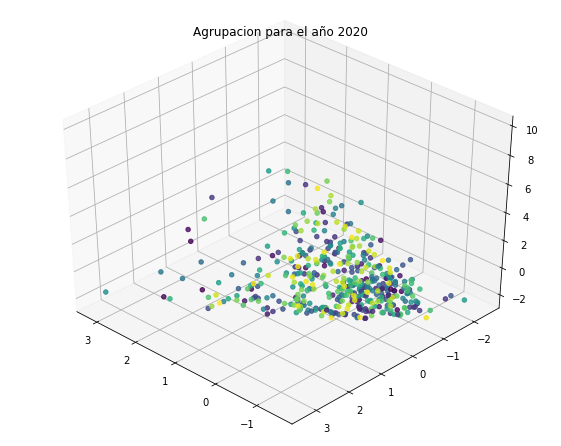

In [ ]:
Labels00=DB.fit_predict(X00)
Labels10=DB.fit_predict(X10)
Labels20=DB.fit_predict(X20)
#----------------------------------------------PLOT00---------------------------
print("coeficiente de silueta:",silhouette_score(X00, Labels00, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X00[:, 0], X00[:, 1], X00[:, 2], c=Labels00, alpha=0.8)
plt.title("Agrupacion para el año 2000")
plt.show()
#----------------------------------------------PLOT10--------------------------- 
print("coeficiente de silueta:",silhouette_score(X10, Labels10, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X10[:, 0], X10[:, 1], X10[:, 2], c=Labels10, alpha=0.8)
plt.title("Agrupacion para el año 2010")

plt.show()
#----------------------------------------------PLOT20--------------------------- 
print("coeficiente de silueta:",silhouette_score(X20, Labels20, metric = 'euclidean'))
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=38, azim=134)
plt.cla()
ax.scatter(X20[:, 0], X20[:, 1], X20[:, 2], c=Labels20, alpha=0.8)
plt.title("Agrupacion para el año 2020")

plt.show()

## Conclusiones


*   Luego de obtener nuestros "clusters", podemos concluir que las diferencias entre conjunto de entrenamiento y demás datasets son evidentes. Y a pesar de que nuestro alcance finaliza justo antes del "data analisis", la desigualdad entre estadísticas de juego, de una época frente a otra, es notable.
*   Fue posible concluir un estimable cambio en los arquetipos de los jugadores, sin embargo, esto no es algo que asevere el hecho de que se reduzca la visualización y el gusto por parte de los espectadores hacia este deporte.
*   Al realizar un sondeo superfluo de cada uno de los datasets empleados en el proyecto, se observa un importante aumento de los intentos tras la línea de los tres puntos, junto con una disminución de las faltas personales, directamente relacionado con el avance de los años. Explicado por una aparente disminución de contacto físico.

